In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("data/training_data_ht2025.csv")
print(df.head())


   hour_of_day  day_of_week  month  holiday  weekday  summertime  temp   dew  \
0            5            5      1        0        0           0  -7.2 -15.0   
1           21            4      1        0        1           0  -1.3 -12.8   
2           21            3      8        0        1           1  26.9  21.8   
3            1            6      1        0        0           0   3.1  -4.0   
4           17            0      3        0        1           0  11.7 -11.4   

   humidity  precip  snow  snowdepth  windspeed  cloudcover  visibility  \
0     53.68     0.0     0        0.0       16.3        31.6        16.0   
1     40.97     0.0     0        0.0       23.9        85.7        16.0   
2     73.39     0.0     0        0.0        0.0        81.1        16.0   
3     59.74     0.0     0        0.0       19.2         0.0        16.0   
4     18.71     0.0     0        0.0       10.5        44.6        16.0   

    increase_stock  
0  low_bike_demand  
1  low_bike_demand  
2  lo

In [27]:
df['increase_stock'].value_counts()

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64

#### Categorical variables:
[ hour_of_day, day_of_week, month, holiday, weekday, summertime ]

#### Numerical variables:
Any other feature

In [28]:
df["increase_stock"] = (df["increase_stock"] == "high_bike_demand").astype(int)

<Axes: title={'center': 'Month vs Increase Stock'}, xlabel='month'>

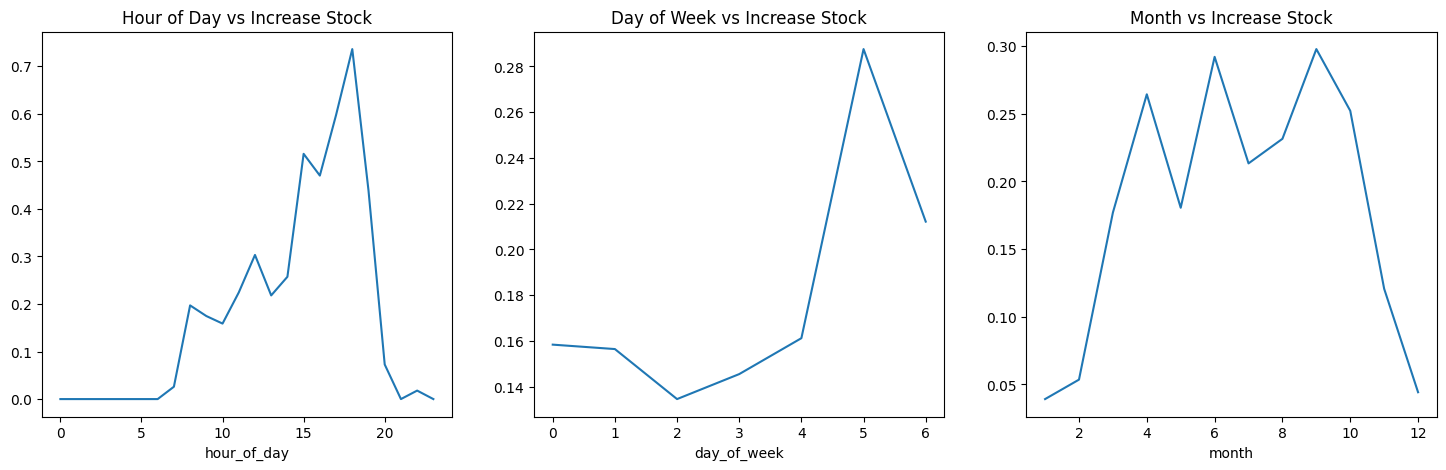

In [29]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

df.groupby('hour_of_day')['increase_stock'].mean().plot(kind='line', ax=axes[0], title='Hour of Day vs Increase Stock')
df.groupby('day_of_week')['increase_stock'].mean().plot(kind='line', ax=axes[1], title='Day of Week vs Increase Stock')
df.groupby('month')['increase_stock'].mean().plot(kind='line', ax=axes[2], title='Month vs Increase Stock')


In [30]:
print(f"Mean 'increase_stock' for holiday: {df[df['holiday']==1]['increase_stock'].mean()}")
print(f"Mean 'increase_stock' for not holiday: {df[df['holiday']==0]['increase_stock'].mean()}")

Mean 'increase_stock' for holiday: 0.16981132075471697
Mean 'increase_stock' for not holiday: 0.18034906270200388


In [31]:
print(f"Mean 'increase_stock' for weekdays: {df[df['weekday']==1]['increase_stock'].mean()}")
print(f"Mean'increase_stock' for not weekdays: {df[df['weekday']==0]['increase_stock'].mean()}")

Mean 'increase_stock' for weekdays: 0.15140845070422534
Mean'increase_stock' for not weekdays: 0.25


<Axes: >

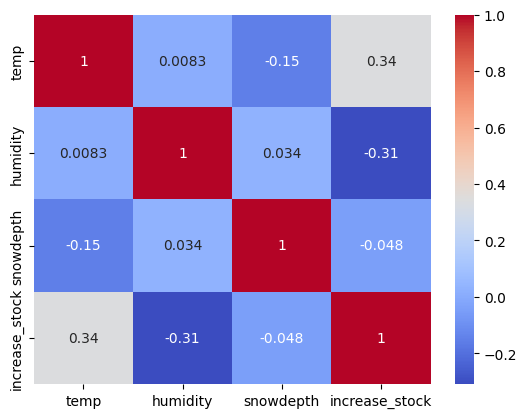

In [32]:
corr = df[['temp', 'humidity', 'snowdepth', 'increase_stock']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

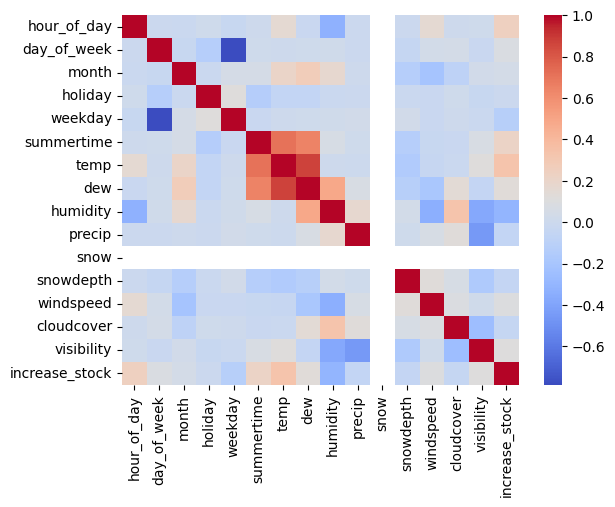

In [33]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')

In [34]:
df.columns

Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

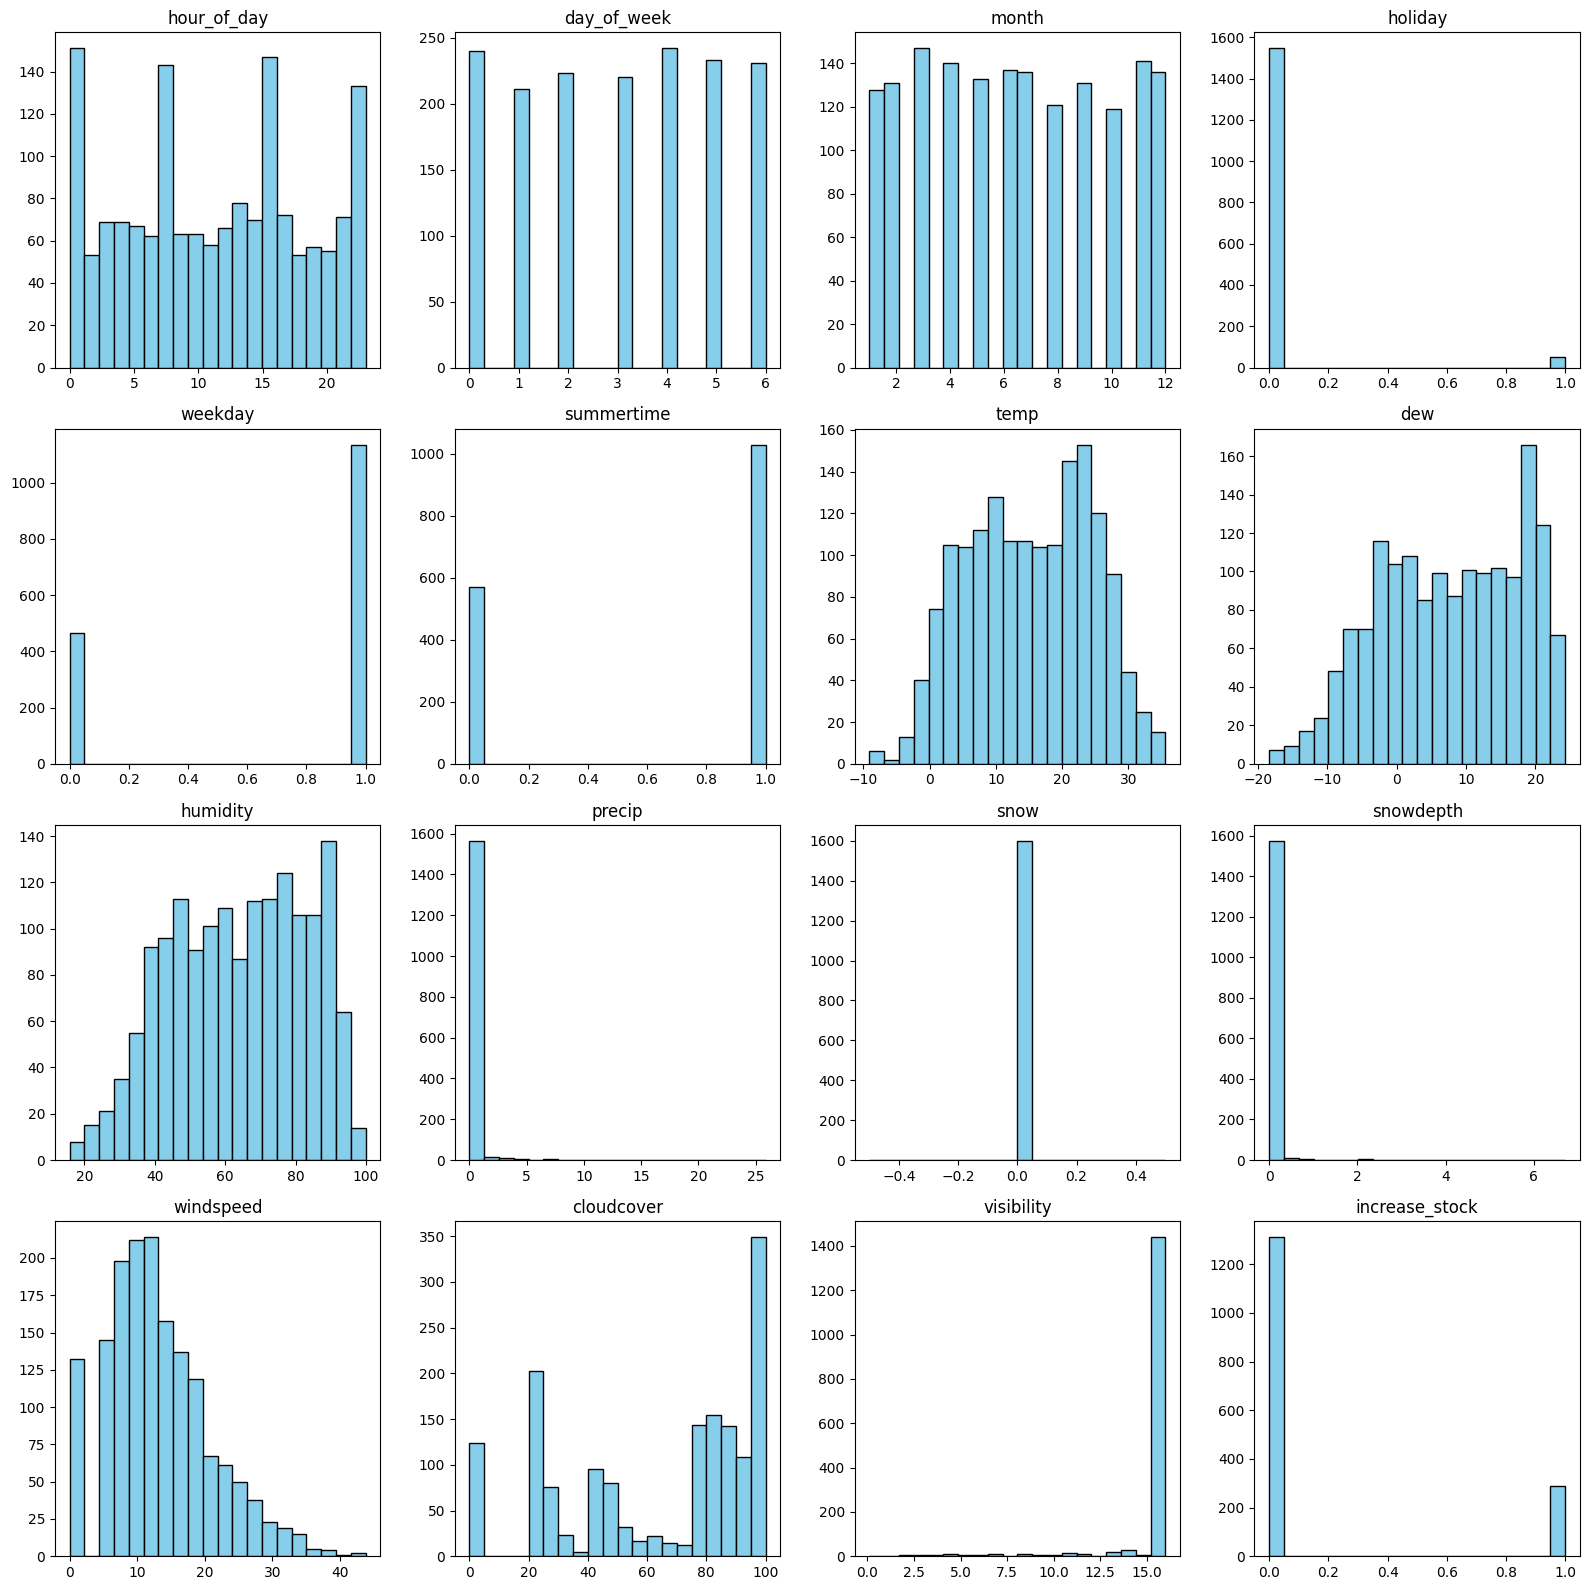

In [35]:
n_rows, n_cols = 4, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))  # Adjust figure size
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy iteration

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)

# Hide any unused subplots if X has fewer than 16 columns
for j in range(i+1, n_rows*n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()